In [1]:
#Inicializar bibliotecas
import statistics as sts
import seaborn as sns
import pandas as pd

In [2]:
#Variaveis globais
pais = "Canada"

In [3]:
#Criar DataFrame pandas
dataFrame = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
dataFrame.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Filtrar dados sobre o Brasil
dfPais = dataFrame.loc[(dataFrame['Country'] == pais)]
dfPais.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
9248,Canada,CAN,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9249,Canada,CAN,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9250,Canada,CAN,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9251,Canada,CAN,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9252,Canada,CAN,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Deletar linhas com dados faltantes
dfPais = dfPais.dropna()
dfPais = dfPais.reset_index(drop=True)
dfPais.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Canada,CAN,1990,458.218336,99.152201,212.870748,125.278127,5.823211,11.958214,3.135836,16.567775
1,Canada,CAN,1991,449.959720,104.170172,200.768222,124.814875,4.770787,12.153899,3.281765,16.060949
2,Canada,CAN,1992,463.758640,106.927432,203.764755,132.083955,4.804072,13.193354,2.985073,16.359691
3,Canada,CAN,1993,464.311598,98.917863,206.888046,137.317145,4.892831,13.343511,2.952202,16.196069
4,Canada,CAN,1994,478.726314,102.540588,212.176928,140.346661,5.769324,14.632432,3.260380,16.518519


<AxesSubplot: xlabel='Year'>

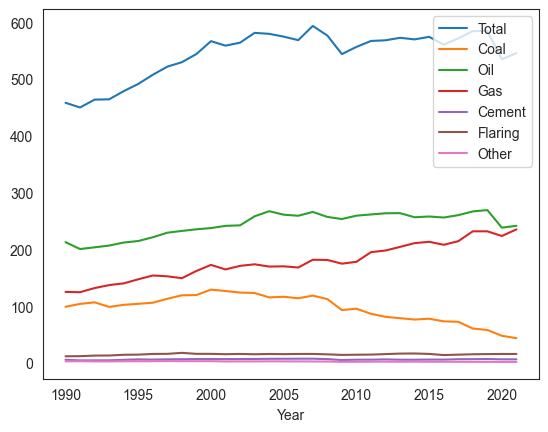

In [6]:
#Primeira visualizacao
sns.set_style("white")
sns.set_palette("tab10")
#dfPais.head()
dfPais.plot(x='Year',y=dfPais.columns[3:-1])

In [7]:
#Remover colunas de Strings e normalizar os dados, procurando correlações
dfPaisNorm = dfPais.drop(columns=['ISO 3166-1 alpha-3','Country','Year'])
dfPaisNorm = (dfPaisNorm - dfPaisNorm.min())/(dfPaisNorm.max() - dfPaisNorm.min())
dfPaisNorm["Year"] = dfPais.loc[:,"Year"]

<AxesSubplot: xlabel='Year'>

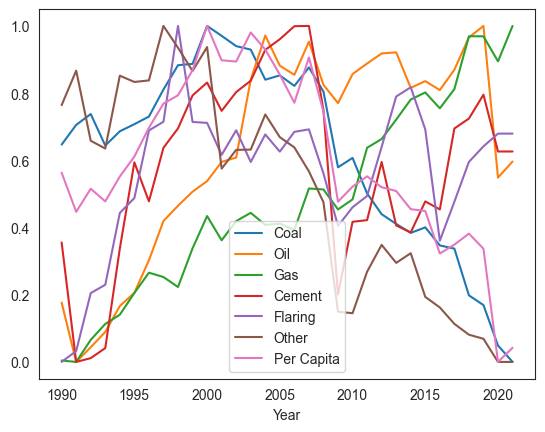

In [8]:
#Plotar dados normalizados
dfPaisNorm.plot(x="Year",y=dfPaisNorm.columns[1:-1],)

In [9]:
#Correlação de Pearson
dfPaisCorr = dfPais.loc[:,dfPais.columns[3:-1]].corr()

<AxesSubplot: >

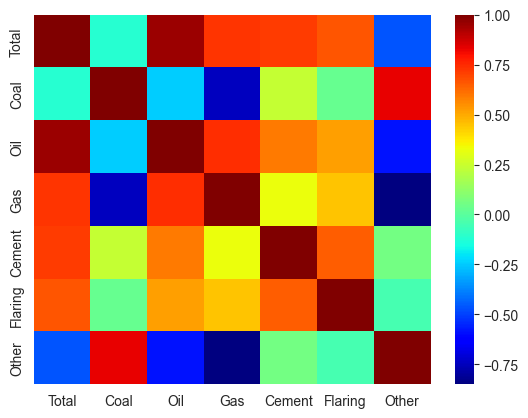

In [10]:
#Plotar heatmap da correlação de Pearson
sns.heatmap(dfPaisCorr, 
            cmap = 'jet')